## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Prevent warnings from showing up
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style(style="whitegrid")
sns.set_color_codes(palette="deep")    

## Data

In [4]:
data = pd.read_csv("data/nig_housing_price.csv")
 
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,geo_zone,GDP_per_Capital_dollars,total_crime_2017
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,North Central,1292.0,5382
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,North Central,1292.0,5382
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,South West,6614.0,50975
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,South West,6614.0,50975
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,South West,6614.0,50975


### Data Dictionary

...

### Data Inspection

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 24326 non-null  float64
 1   bathrooms                24326 non-null  float64
 2   toilets                  24326 non-null  float64
 3   parking_space            24326 non-null  float64
 4   title                    24326 non-null  object 
 5   town                     24326 non-null  object 
 6   state                    24326 non-null  object 
 7   price                    24326 non-null  float64
 8   geo_zone                 24326 non-null  object 
 9   GDP_per_Capital_dollars  24326 non-null  float64
 10  total_crime_2017         24326 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


There will be a few adustment on the dataset to make sure it is okay to train the model on. these adjustments includes:
- The data-type for columns such as bedrooms, bathrooms, toilets, and parking-space will be changed from a float to an integer.
- The column name `title` will be renamed to `type`.

In [6]:
# Count the number of missing values in each columns
data.isnull().sum()

bedrooms                   0
bathrooms                  0
toilets                    0
parking_space              0
title                      0
town                       0
state                      0
price                      0
geo_zone                   0
GDP_per_Capital_dollars    0
total_crime_2017           0
dtype: int64

In [7]:
# Display the number of unique value and also the values for all character (object) columns.
for col in data.select_dtypes("object").columns:
    print(col)
    print(f"Number of Unique Values: {data[col].nunique()}")
    print(f"Unique Values:\n{data[col].unique()}\n")
    print("-"*50)

title
Number of Unique Values: 7
Unique Values:
['Detached Duplex' 'Terraced Duplexes' 'Semi Detached Duplex'
 'Detached Bungalow' 'Block of Flats' 'Semi Detached Bungalow'
 'Terraced Bungalow']

--------------------------------------------------
town
Number of Unique Values: 189
Unique Values:
['Mabushi' 'Katampe' 'Lekki' 'Ajah' 'Epe' 'Lokogoma District' 'Oredo'
 'Victoria Island (VI)' 'Mowe Ofada' 'Ikeja' 'Ikoyi' 'Magodo' 'Kaura'
 'Galadimawa' 'Gwarinpa' 'Abeokuta North' 'Lugbe District' 'Ibeju Lekki'
 'Yaba' 'Sango Ota' 'Ifako-Ijaiye' 'Agege' 'Ikorodu' 'Jahi' 'Ibadan'
 'Orozo' 'Ifo' 'Owerri North' 'Guzape District' 'Idu Industrial'
 'Owerri Municipal' 'Isheri North' 'Utako' 'Port Harcourt' 'Kuje' 'Isheri'
 'Life Camp' 'Ipaja' 'Ado-Odo/Ota' 'Dape' 'Mushin' 'Ejigbo' 'Isolo'
 'Ojodu' 'Gaduwa' 'Enugu' 'Dakwo' 'Asokoro District' 'Alimosho' 'Sagamu'
 'Chikun' 'Egbeda' 'Wuye' 'Kubwa' 'Shomolu' 'Ogudu' 'Owerri West' 'Ibafo'
 'Surulere' 'Obio-Akpor' 'Ayobo' 'Apo' 'Mowe Town' 'Ibadan South-We

7 unique house property types are included in the dataset although this is a very small subset, but they represent some of the more popular options available to many nigerians.

In more details about the location, all 6 geo-political location are present although the exact number in each zones is unknown for now but will be known later in the analysis. Only 25 states of the 37 (Plus the FCT ) are available in the data. Lastly, for the selected town (189 of them) includes various locations within each states where these properties are located.

### Data Cleaning

#### Duplicated samples

In [8]:
print(f"Number of original data samples: {data.shape[0]:,}")

Number of original data samples: 24,326


In [9]:
# Check for sample duplications.
print(f"Total number of duplicate samples: {data.duplicated().sum():,}\n")

# Drop all dulicated samples from the data
data = data.drop_duplicates(keep ="first")

print(f"Total number of samples after dropping duplicated samples: {data.shape[0]:,}")

Total number of duplicate samples: 10,438

Total number of samples after dropping duplicated samples: 13,888


#### Rename columns

In [10]:
data = data.rename(columns={
    "title": "type", 
    "total_crime_2017": "total_crime", 
    "GDP_per_Capital_dollars": "GDP_per_capital"
}) 

# Print column names
list(data.columns)

['bedrooms',
 'bathrooms',
 'toilets',
 'parking_space',
 'type',
 'town',
 'state',
 'price',
 'geo_zone',
 'GDP_per_capital',
 'total_crime']

#### Data type

In [11]:
# Convert each selected variables from float to integer
for col in ["bedrooms",	"bathrooms", "toilets", "parking_space"]:
    data[col] = data[col].astype("int64")

In [12]:
data.dtypes

bedrooms             int64
bathrooms            int64
toilets              int64
parking_space        int64
type                object
town                object
state               object
price              float64
geo_zone            object
GDP_per_capital    float64
total_crime          int64
dtype: object

## Exploratory Data Analysis

In [13]:
data.select_dtypes(["int64", "float64"]).describe()

,bedrooms,bathrooms,toilets,parking_space,price,GDP_per_capital,total_crime
count,13888.000000,13888.000000,13888.000000,13888.000000,1.388800e+04,13888.000000,13888.000000
mean,4.185412,4.516993,4.997264,4.072725,4.002137e+08,4670.548387,33001.309260
std,1.317457,1.360651,1.424560,1.638640,1.614926e+10,2488.529716,22848.088519
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04,674.000000,282.000000
25%,3.000000,4.000000,4.000000,3.000000,3.800000e+07,1292.000000,5382.000000
50%,4.000000,5.000000,5.000000,4.000000,7.500000e+07,6614.000000,50975.000000
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08,6614.000000,50975.000000
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12,6614.000000,50975.000000


### House property price

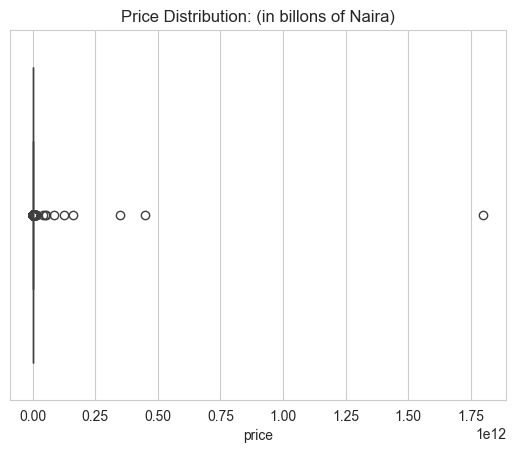

In [14]:
sns.boxplot(data=data, x="price")
plt.title("Price Distribution: (in billons of Naira)")
plt.show()

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# sns.boxplot(data=data, x="price", ax=ax1)
# ax1.set_title("House Price Distribution")

# sns.histplot(data=data, x="price", ax=ax2)
# ax2.set_title(" ")

# plt.tight_layout()

# plt.show()

The is a clear case of outliers in the price variable and a winsorization technique will be used to handle outliers in a dataset by replacing the extreme values (outliers) with specified percentile values. This can help mitigate the influence of these extreme values on the model's performance while retaining the overall distribution of the data. 

In [15]:
def winsorize(df, var, lower_percentile=5, upper_percentile=95):
    """
    Winsorizes a numpy array by capping outliers at specified percentiles.

    Args:
        df: pandas dataframe array containing the data to be winsorized.
        var: (str): The variable to winsorize.
        lower_percentile (int, optional): The lower percentile to use for capping (default: 5).
        upper_percentile (int, optional): The upper percentile to use for capping (default: 95).

    Returns:
        A new Pandas dataframe with outliers capped to the specified percentiles.
    """
    f_df = df.copy()
    # Calculate lower and upper limites based on percentiles
    lower_limit = np.percentile(f_df[var], lower_percentile)
    upper_limit = np.percentile(f_df[var], upper_percentile)

    # Apply Winsorization
    f_df[f'{var}_wins'] = f_df[var].clip(lower_limit, upper_limit)

    return f_df

In [16]:
data = winsorize(data, "price")

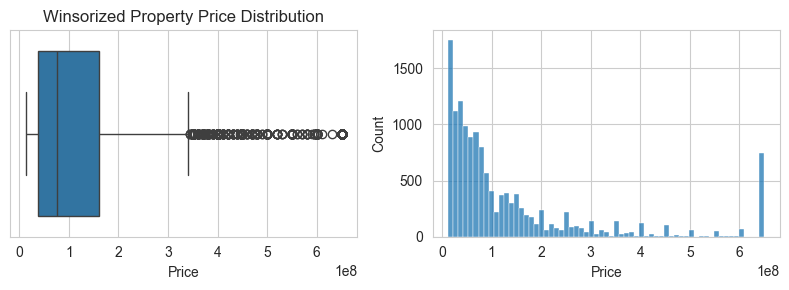

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.boxplot(data=data, x="price_wins", ax=ax1)
ax1.set_title("Winsorized Property Price Distribution")
ax1.set_xlabel("Price")

sns.histplot(data=data, x="price_wins", ax=ax2)
ax2.set_title(" ")
ax2.set_xlabel("Price")
plt.tight_layout()

plt.savefig('images/price_dist.png') 
plt.show()

There Are still many house price at the upper end, to be considered outliers 

In [86]:
print(f"Minimum price: {data['price_wins'].min()}")
print(f"Maximum price: {data['price_wins'].max()}")

Minimum price: 13000000.0
Maximum price: 650000000.0


### Location variables

#### Town

In [21]:
data[["state", "town"]].value_counts().reset_index().head(50)

,state,town,count
0,Lagos,Lekki,3392
1,Lagos,Ajah,1192
2,Lagos,Ikoyi,866
3,Lagos,Ikeja,519
4,Rivers,Port Harcourt,410
5,Lagos,Ibeju Lekki,396
6,Oyo,Ibadan,370
7,Abuja,Gwarinpa,345
8,Lagos,Victoria Island (VI),323
9,Lagos,Magodo,247


#### State

In [22]:
(
    data
        .groupby("state")["price_wins"]
        .agg(["count", "mean"])
        .reset_index()
        .sort_values(by="mean", ascending=False)
        .rename(columns = {"mean": "Avg. price", "count": "No. Property"})
)

,state,No. Property,Avg. price
1,Abuja,3118,1.637162e+08
17,Lagos,8571,1.491924e+08
5,Borno,1,1.050000e+08
0,Abia,9,9.222222e+07
24,Rivers,422,9.056354e+07
4,Bayelsa,2,9.000000e+07
3,Anambra,141,8.923359e+07
7,Delta,62,8.522581e+07
11,Imo,229,7.425328e+07
10,Enugu,121,6.674504e+07


#### Geo-Zone

In [23]:
# data["geo_zone"].value_counts().reset_index()

(
    data
        .groupby("geo_zone")["price_wins"]
        .agg(["count", "mean"])
        .reset_index()
        .sort_values(by="mean", ascending=False)
        .rename(columns = {"mean": "Avg. price", "count": "No. Property"})
)

,geo_zone,No. Property,Avg. price
0,North Central,3143,1.626497e+08
5,South West,9606,1.368033e+08
1,North East,1,1.050000e+08
4,South South,611,8.158889e+07
3,South East,500,7.698417e+07
2,North West,27,3.225926e+07


### Property Features

In [24]:
property_feat_cols = ["bedrooms", "bathrooms", "toilets", "parking_space"]

In [65]:
def property_features(df, var_name, var_title=None):
    """ """
    var_title = var_title if var_title is not None else str.title(var_name)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # Count unique values subplot
    sns.countplot(data=df, x=var_name, ax=ax1)
    ax1.set_title(f"Properties with Each Specific Number of {var_title}")

    # Average property price subplot
    avg_price_df = df.groupby(var_name)["price_wins"].agg("median").reset_index()
    sns.barplot(data=avg_price_df, x=var_name, y="price_wins", ax=ax2)
    ax2.set_title(f"Median Price by No. of {var_title}")
    ax2.set_ylabel("Price")

    plt.tight_layout()

In [93]:
def cat_price_distribution_plot(data, var_name:str, plt_title:str=None):

    plt_title = plt_title if plt_title is not None else str.title(var_name).replace("_", " ")

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.boxplot(
        data=data, 
        x=var_name, 
        y="price_wins",
        hue=var_name,
        width=.5,
        legend=None,
        medianprops={"color": "black", "linewidth": 2},
        flierprops={"marker": "o"},
        # palette="vlag"
    )

    plt.xlabel("")
    plt.ylabel("Price")
    plt.title(plt_title)

#### Bedroom

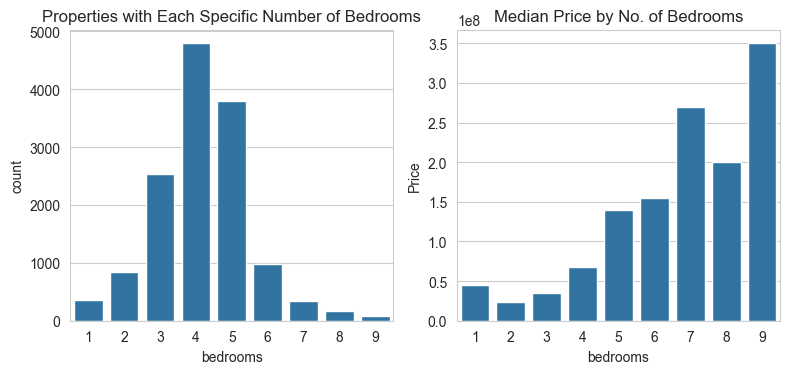

In [66]:
property_features(data, "bedrooms")

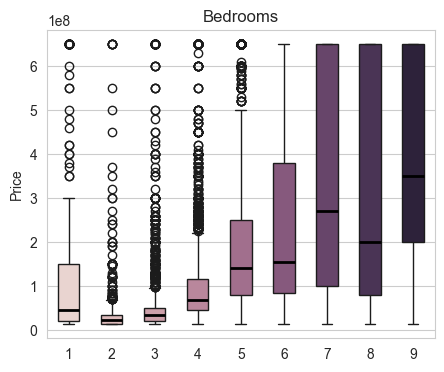

In [94]:
cat_price_distribution_plot(data, "bedrooms")
plt.savefig('images/price_bedroom_dist.png') 

#### Bathroom

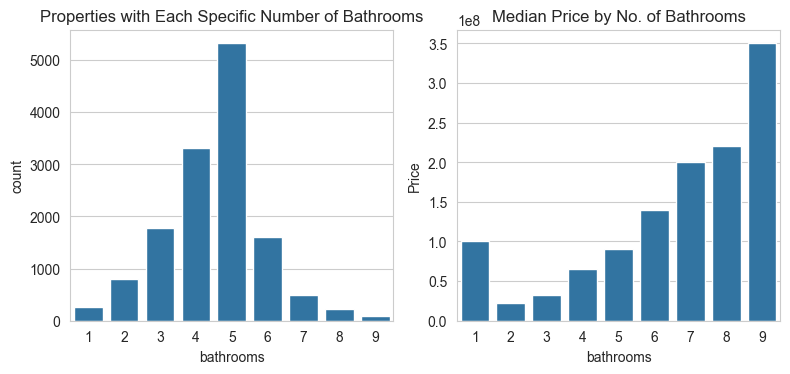

In [68]:
property_features(data, "bathrooms")

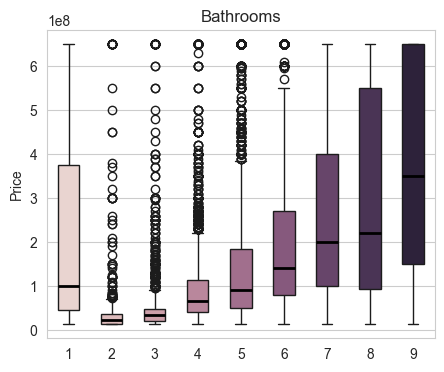

In [75]:
cat_price_distribution_plot(data, "bathrooms")
plt.savefig('images/price_bathroom_dist.png') 

#### Toilet

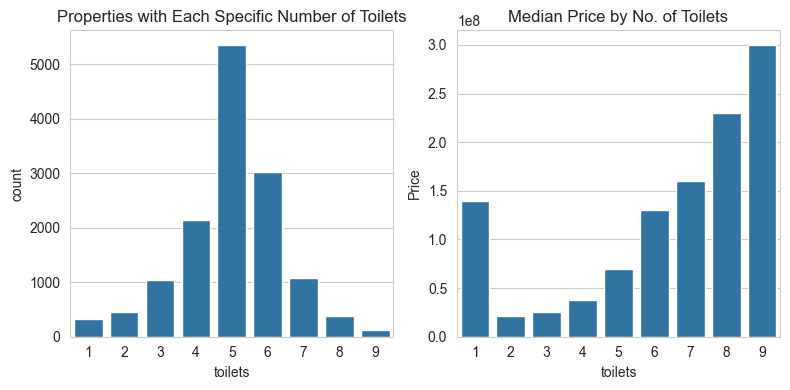

In [70]:
property_features(data, "toilets")

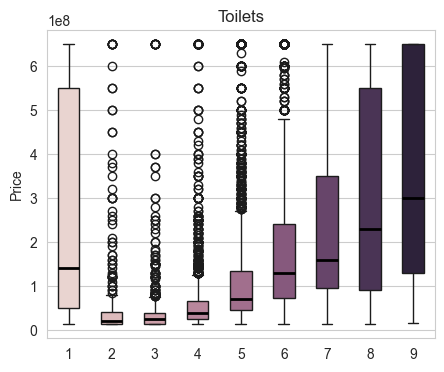

In [76]:
cat_price_distribution_plot(data, "toilets")
plt.savefig('images/price_toilet_dist.png') 

#### Packing Space

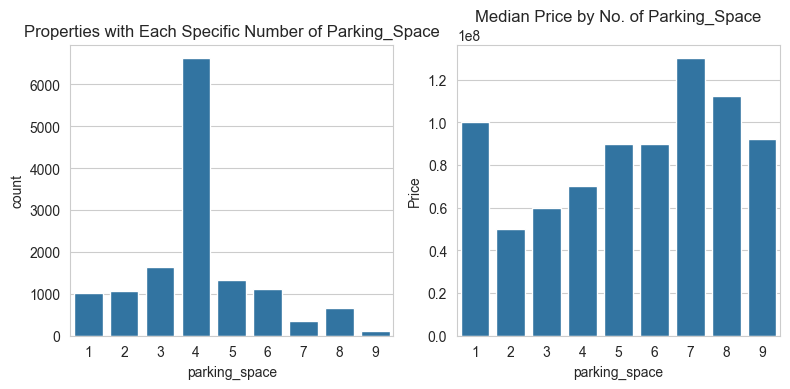

In [73]:
property_features(data, "parking_space")

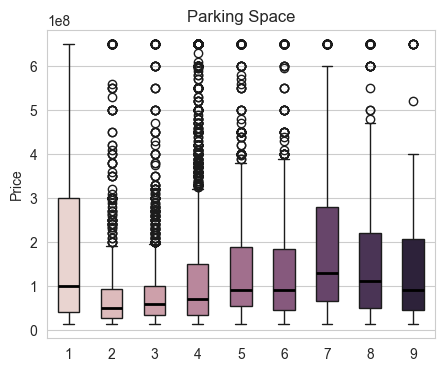

In [80]:
cat_price_distribution_plot(data, "parking_space")
plt.savefig('images/price_parking_space_dist.png') 

### Economic Variables

In [40]:
temp = data.groupby("state")[["GDP_per_capital", "total_crime"]].agg("mean").reset_index()

#### GDP per Capital

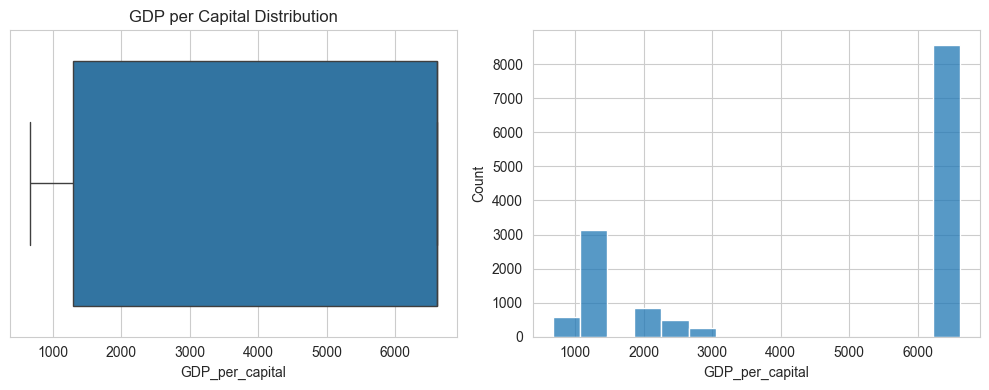

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=data, x="GDP_per_capital", ax=ax1)
ax1.set_title("GDP per Capital Distribution")

sns.histplot(data=data, x="GDP_per_capital", ax=ax2)
ax2.set_title(" ")

plt.tight_layout()
plt.show()

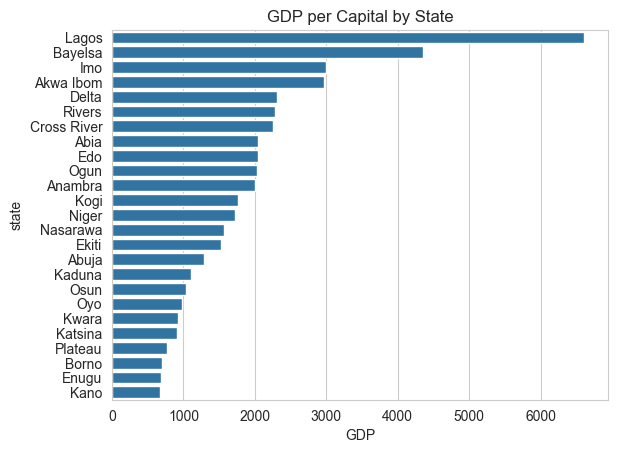

In [42]:
sns.barplot(data=temp.sort_values(by="GDP_per_capital", ascending=False), x="GDP_per_capital", y="state")
plt.title("GDP per Capital by State")
plt.xlabel("GDP")
plt.show()

#### Recent Crime Rate

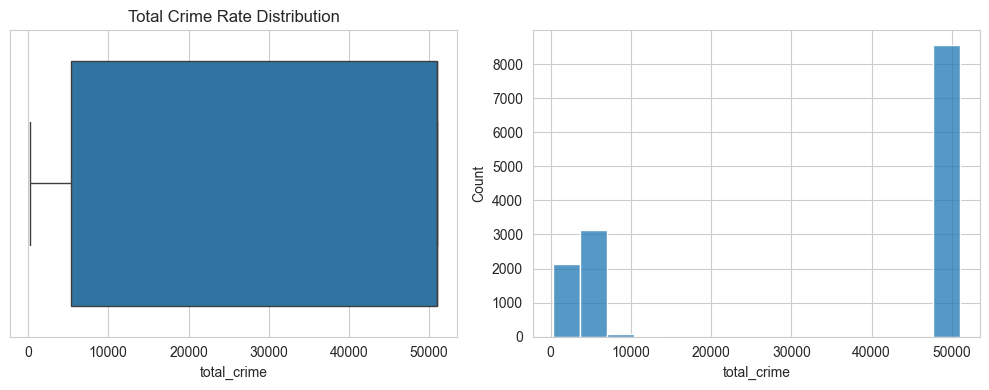

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=data, x="total_crime", ax=ax1)
ax1.set_title("Total Crime Rate Distribution")

sns.histplot(data=data, x="total_crime", ax=ax2)
ax2.set_title(" ")

plt.tight_layout()
plt.show()

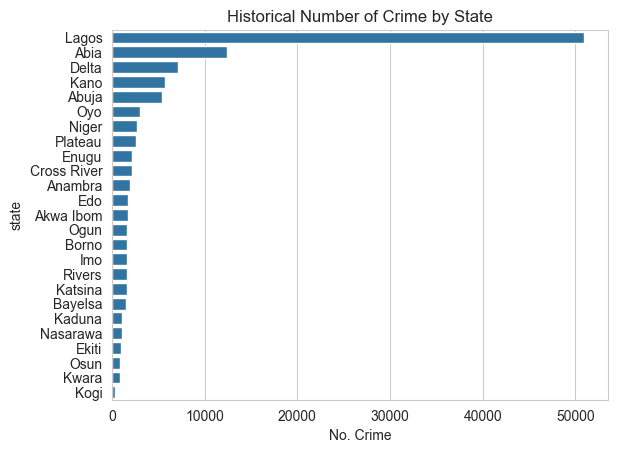

In [45]:
## Crime 
sns.barplot(data=temp.sort_values(by="total_crime", ascending=False), x="total_crime", y="state")
plt.title("Historical Number of Crime by State")
plt.xlabel("Number of Crime")
plt.show()

### Correlation Analysis

In [46]:
cor = data.select_dtypes(["int64", "float64"]).corr()
cor

,bedrooms,bathrooms,toilets,parking_space,price,GDP_per_capital,total_crime,price_wins
bedrooms,1.000000,0.693736,0.635460,0.162567,0.028950,0.026723,0.039215,0.408601
bathrooms,0.693736,1.000000,0.787985,0.172913,0.023979,0.024625,0.036340,0.325962
toilets,0.635460,0.787985,1.000000,0.188258,0.017481,0.063278,0.075708,0.299350
parking_space,0.162567,0.172913,0.188258,1.000000,0.019199,-0.002299,-0.006666,0.059491
price,0.028950,0.023979,0.017481,0.019199,1.000000,0.011040,0.011469,0.061363
GDP_per_capital,0.026723,0.024625,0.063278,-0.002299,0.011040,1.000000,0.986667,0.075625
total_crime,0.039215,0.036340,0.075708,-0.006666,0.011469,0.986667,1.000000,0.097394
price_wins,0.408601,0.325962,0.299350,0.059491,0.061363,0.075625,0.097394,1.000000


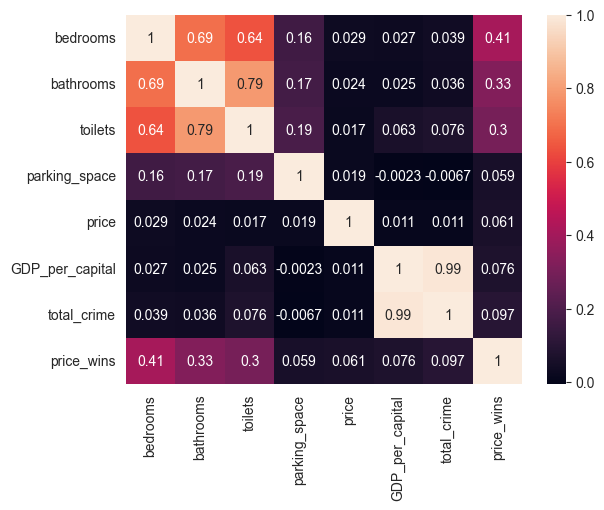

In [47]:
sns.heatmap(cor, annot=True)
plt.show()

GDP per capital / price >> 0.076
total crime / price >> 0.097

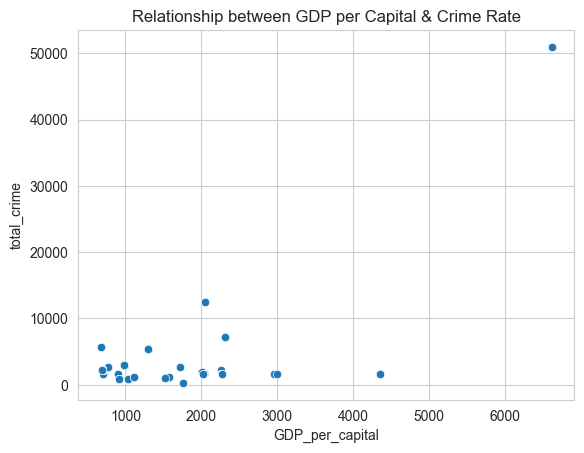

In [48]:
sns.scatterplot(data=data, x="GDP_per_capital", y="total_crime")
plt.title("Relationship between GDP per Capital & Crime Rate")
plt.show()

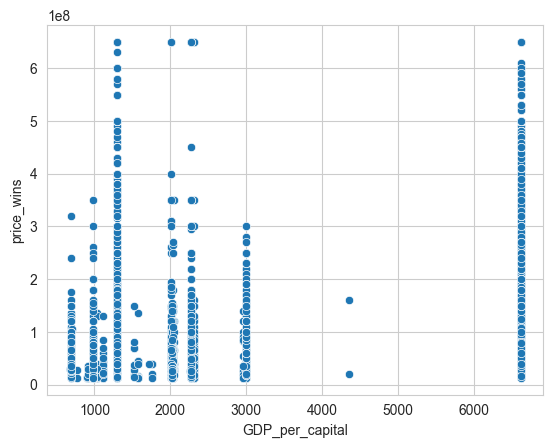

In [87]:
sns.scatterplot(data=data, x="GDP_per_capital", y="price_wins")
# plt.title("Relationship between GDP per Capital & Crime Rate")
plt.show()

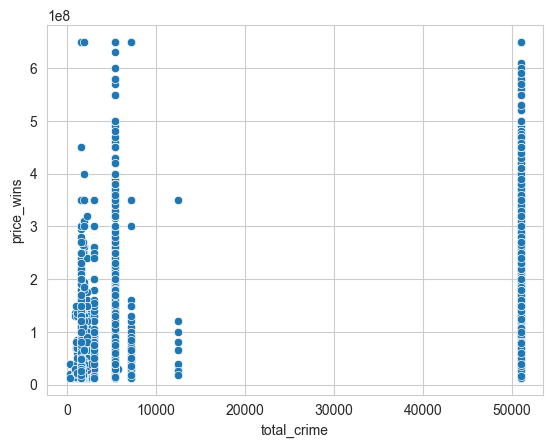

In [88]:
sns.scatterplot(data=data, x="total_crime", y="price_wins")
# plt.title("Relationship between GDP per Capital & Crime Rate")
plt.show()

In [49]:
data = data.drop("price", axis=1)

data.to_csv("data/model_house_price.csv", index=False)

The most informative way to assess a raw MAE value is to compare it to the range of your target variable.
If your target variable typically falls within a range of, say, 100 to 1000, then an MAE of 15,478 indicates significant errors. The model's predictions are off by an average of over 15 times the target variable's typical values.

Calculate MAE as a Percentage:

Dividing the MAE by the average value of your target variable and multiplying by 100 expresses the error as a percentage. This provides a relative measure:

In [ ]:
# Assuming you have the average target variable value (`avg_target_value`)
average_error_percentage = (MAE / avg_target_value) * 100
print(f"Average Error Percentage: {average_error_percentage:.2f}%")
